In this chapter, you’ll use the seaborn Python library to create informative visualizations using categorical data—including categorical plots (cat-plot), box plots, bar plots, point plots, and count plots. You’ll then learn how to visualize categorical columns and split data across categorical columns to visualize summary statistics of numerical columns.

## Introduction to categorical plots using Seaborn

#### Boxplot understanding 

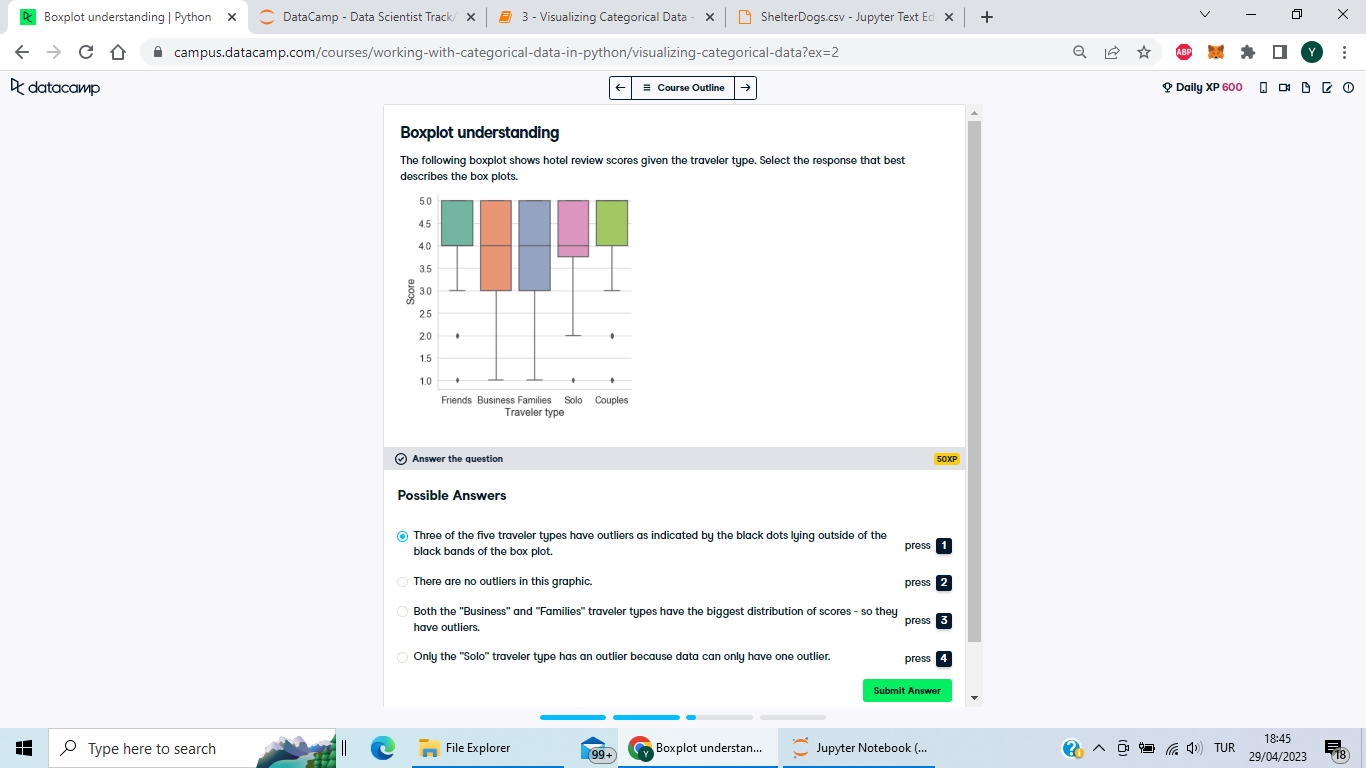

Well done! There are three categories ("Friends", "Solo", "Couples") that have outliers.

#### Creating a box plot
When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.

Note that for the remainder of this chapter, seaborn as sns and matplotlib.pyplot as plt will be preloaded for you.

In [2]:
import pandas as pd
reviews = pd.read_csv("lasvegas_tripadvisor.csv")
reviews

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,Europe,1,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,8,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,4,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826,North America,9,December,Wednesday


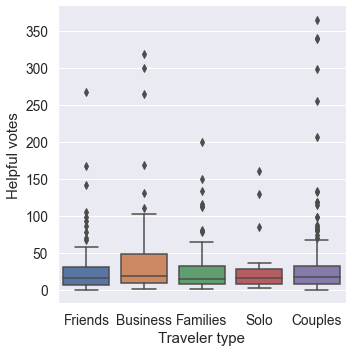

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(x = "Traveler type", y = "Helpful votes", data = reviews, kind="box")

plt.show()

Great work! It looks like business travelers have left the most helpful reviews, although there are a few reviews by couples that have been really helpful to others.

## Seaborn bar plots
#### Creating a bar plot
Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable "Period of stay". The dataset reviews has been preloaded for you.

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


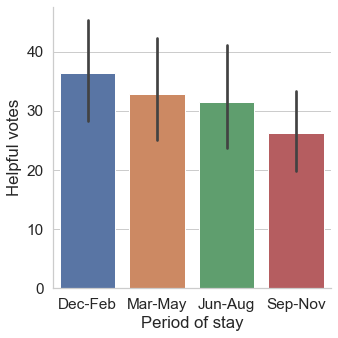

In [4]:
# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(x="Period of stay", y="Helpful votes", data = reviews, kind='bar')
plt.show()

Great work with these bar plots! With .value_counts() we see that each category has a similar number of reviews. It also looks like potential guests find reviews from December-February to be the most helpful, while reviews from September-November appear to be the least helpful.

#### Ordering categories
Not all categories are created equal. In the hotel review dataset, reviews, hotel owners know that most of their customers are from North America. When visualizing data broken out by "User continent" they might want North America to appear first. An ordered list of user continents has been provided as continent_categories. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.

North America    295
Europe           118
Oceania           41
Asia              36
South America      7
Africa             7
Name: User continent, dtype: int64


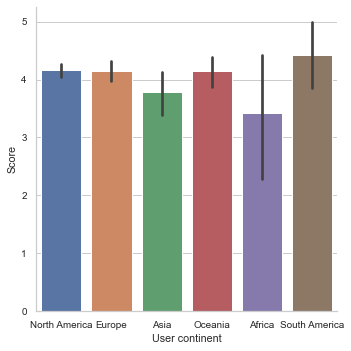

In [5]:
# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

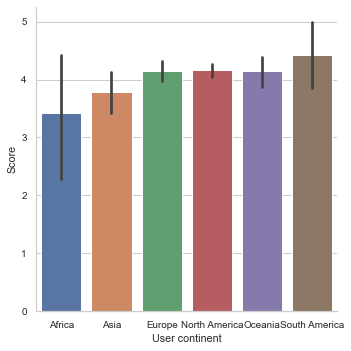

In [6]:
# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype("category")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

['North America', 'Europe', 'Oceania', 'Asia', 'South America', 'Africa']


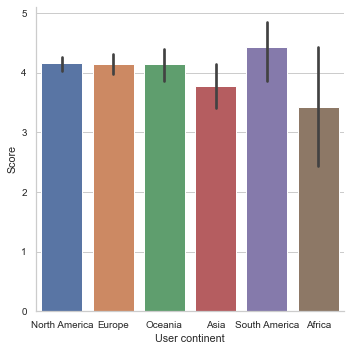

In [7]:
# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
print(continent_categories)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

Awesome work! You have successfully ordered the graphic from the most common user continent to the least common. Notice that the confidence intervals are smaller for continents with more reviews.

#### Bar plot using hue
Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.

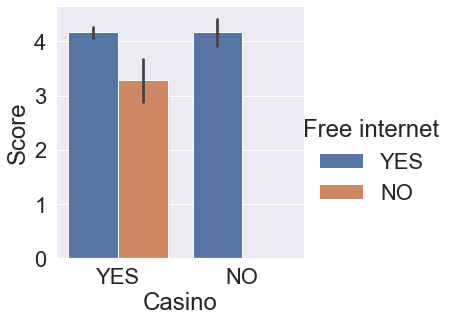

In [8]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x = "Casino", y="Score", data=reviews, kind="bar", hue="Free internet")
plt.show()

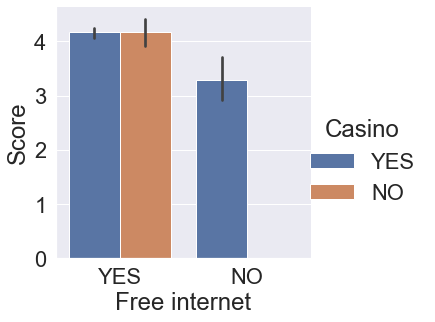

In [9]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

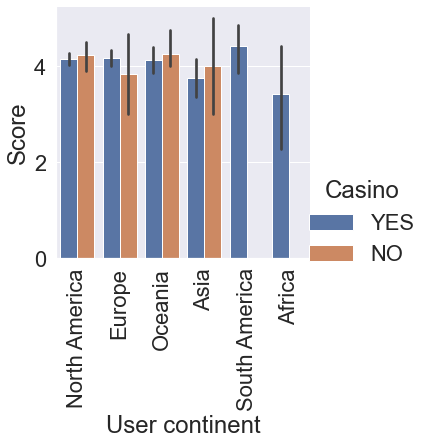

In [10]:
# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
ax = sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
ax.set_xticklabels(rotation=90)
plt.show()

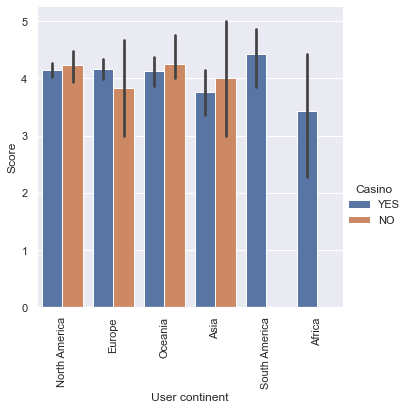

In [11]:
# Lower the font size so that all text fits on the screen.
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
ax = sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
ax.set_xticklabels(rotation=90)
plt.show()

Great job. When creating multiple visualizations, you need to make sure the Seaborn settings will work for all of the possible outputs. For your dashboard, you made font_scale smaller because of the number of categories in the x parameter.

## Point and count plots

#### Creating a point plot
Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, "Nr. reviews", which is the number of reviews a reviewer has previously written, across a hotel's star rating, "Hotel stars". Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.

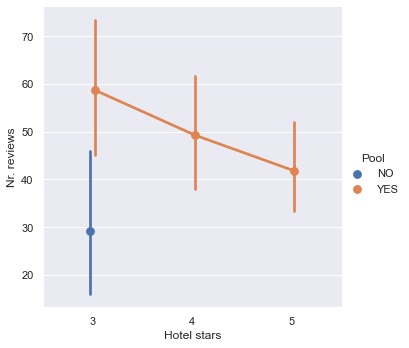

In [12]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x = "Hotel stars",
  y = "Nr. reviews",
  data=reviews,
  # Specify a point plot
  kind="point",
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge=True
)
plt.show()

Nice! Although it is great to see big differences in the average number of previous reviews across the different hotel star ratings for hotels with a pool, there aren't enough 4 and 5 star hotels without a pool to display any information. We might want to find a different category for the hue parameter here or just show the 'Nr. of reviews' across the different hotel star ratings.

#### Creating a count plot
When creating quick analysis of frequency counts, you have been using .value_counts(). This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you will visualize the number of reviews by their "Score". Although "Score" has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The reviews dataset has been preloaded.

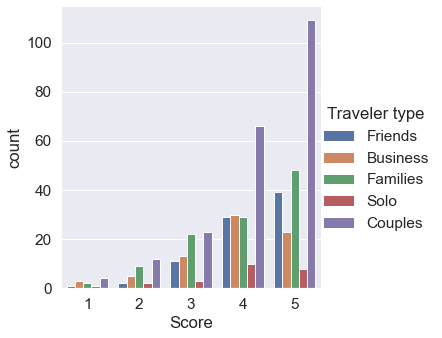

In [13]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  x="Score", data = reviews,kind="count",hue="Traveler type"
)
plt.show()

Excellent! The couples Traveler type and a score of 5 were the most common values found in the data. Don't worry about the legend placement. We can move this outside of the chart if needed.

#### Review catplot() types
Analysts are often asked to create visualizations based on categorical columns. Selecting the best visualization for the task at hand takes practice. This exercise will recap the four different types of plots that were discussed in this chapter so that you can use the correct plot when you begin making visualizations.

For this exercise, drag the different kind's of plots into the order in which they appear in the instructions.

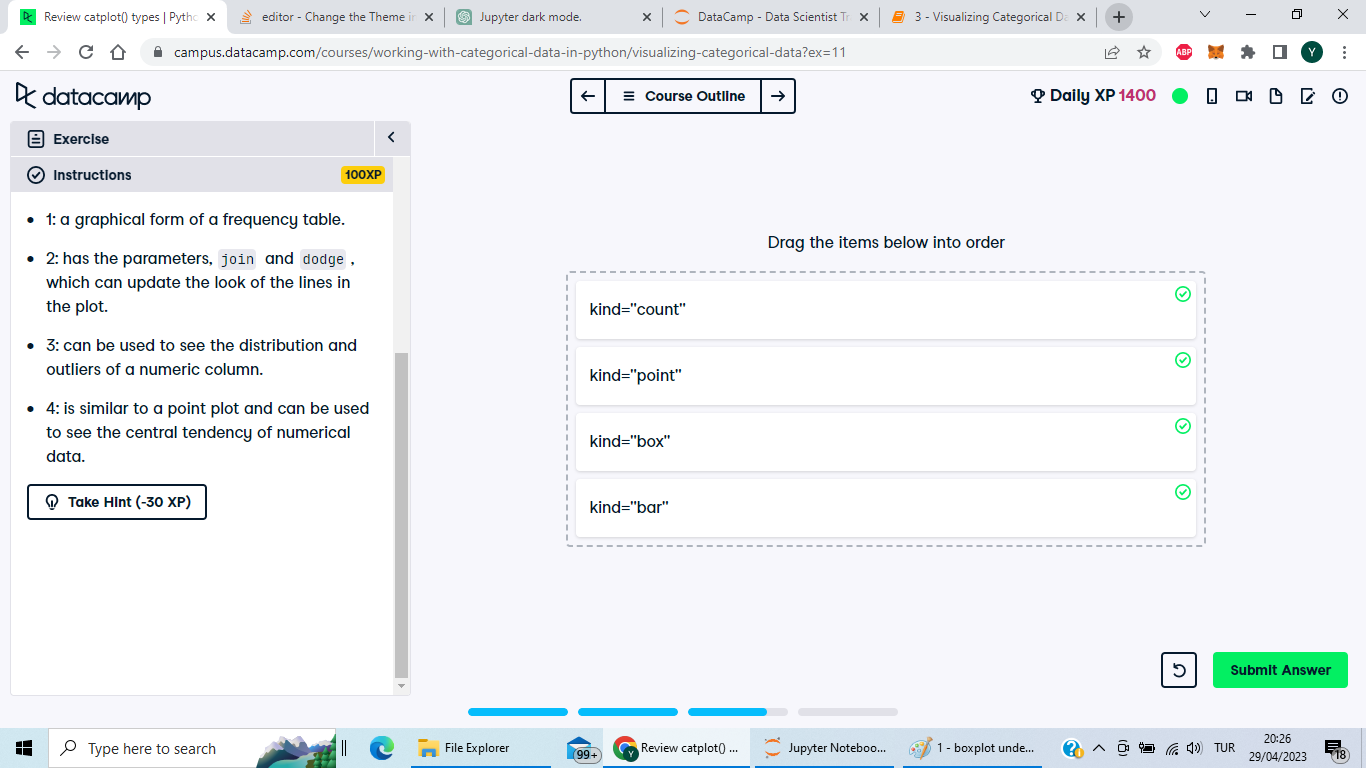

Great job! There are a lot of different uses for seaborn's catplot() and you clearly understand what each one is used for!

## Additional catplot() options

#### One visualization per group
While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by "Period of stay" and by the day of the week, "Review weekday". The goal of this visualization is to see what day of the week has the most reviews for each of the four periods of stay. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.

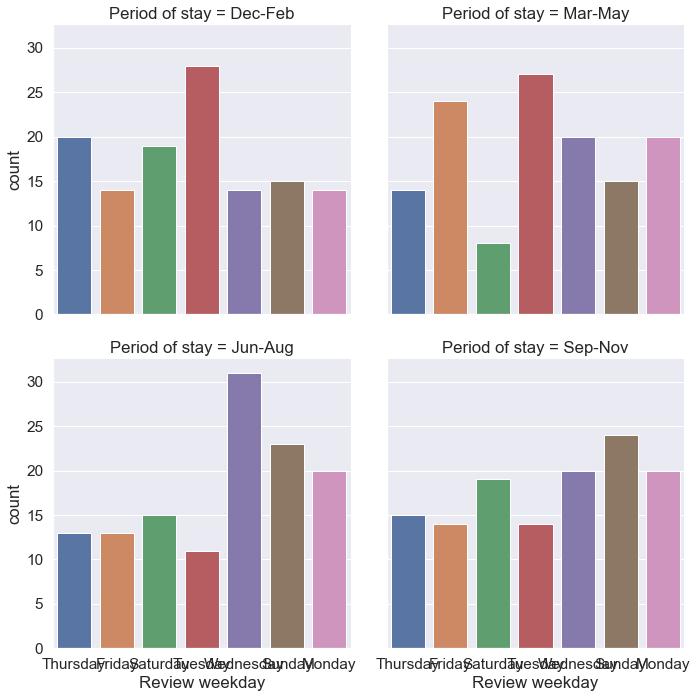

In [14]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x = "Review weekday",
  # Specify Period of stay as the column to create individual graphics for
  col="Period of stay",
  # Specify that a count plot should be created
  kind="count",
  # Wrap the plots after every 2nd graphic.
  col_wrap =2,
  data=reviews
)
plt.show()

Great work! Did you notice that Tuesday was the most common review day for December through May, but one of the least common days for June through November? Creating side-by-side categorical plots is a great way to visualize your data.

#### Updating categorical plots
Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with "Free internet" receive higher reviews given the "Traveler type".

Creating visualizations is an iterative process. In this exercise, you will start with a basic graphic and iteratively add features until you have a finished product. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.

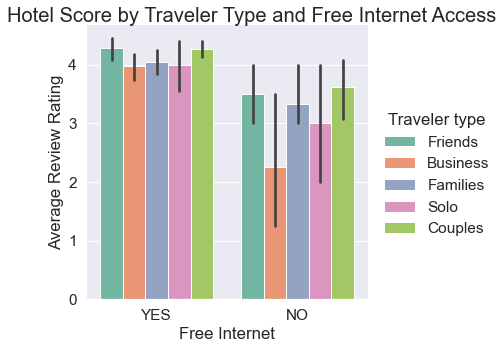

In [15]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=.93)
plt.show()

Great job! It looks like free internet really makes a difference, especially for business-related travelers. It is important to create plots that highlight the results you are trying to convey.